## Classification
### Introduction
In classification, we assign an input vector $\mathbf{x}\in \mathbf{R}^d$ to one of $K$ classes. That is we aim to learn a function 

$f:\mathbf{R}^d\rightarrow [K]$

#### Simple Classifiers

Let us get some intuition for the classification problem by generating some toy data from two classes. These are two widely separated Gaussian blobs.

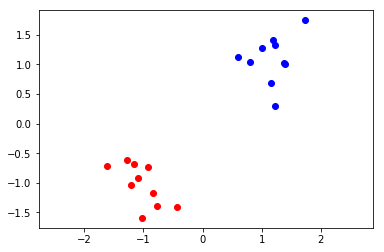

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

num_class = 2
num_per_class = 10
var = 0.1
means = [[1,1],[-1,-1]]
cov = [[var, 0], [0, var]] 
X = np.array([])
y = []
class_color = ['b','r']

for class_index in range(num_class):
    class_data = np.random.multivariate_normal(means[class_index],
                                               cov, 
                                               num_per_class)
    X = np.vstack([X, class_data]) if X.size else class_data
    y = np.concatenate((y, np.ones(num_per_class) * class_index))
    plt.plot(class_data[:, 0], 
             class_data[:,1], 
             class_color[class_index] + 'o')
    plt.axis('equal')


Intuitively, if we can draw a straight line separating the two classes, a ideal classifier would assign points on one side of the line to one class and those on the other side to the other class. We would use training data to learn the appropriate line. Problems where we can separate classes using lines (hyperplanes) are said to be *linearly separable* and represent "simple" cases. Often we are unable to draw lines to separate classes. However, state of the art machine learning methods are still able to work in this cases.

### Nearest Neighbour Classifier
After training our classifier, we aim to be able to correctly classify new and previously unseen examples. Returning to the previous example, let us generate a random point from one of the two classes


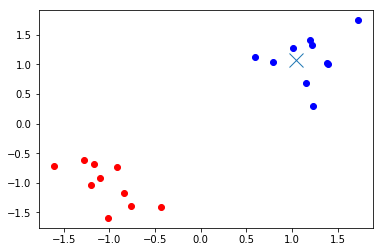

In [6]:
data_class = np.random.binomial(1,.5) # either class 1 or 0
test_data = np.random.multivariate_normal(means[data_class], cov, 1)

plt.plot(X[np.array(y)==0,0], X[np.array(y)==0,1], class_color[0] + 'o')
plt.plot(X[np.array(y)==1,0], X[np.array(y)==1,1], class_color[1] + 'o')
plt.plot(test_data[0,0], test_data[0,1], 'x', markersize=14)

In this case we can get a very good classifier by assigning the class of the nearest training point to the test point. This is the nearest neighbour classifier.


In [7]:
#nearest neighbour classifier
dist = np.sqrt(np.sum((X - test_data)**2, 1))
print('True Test Class: %d Predicted Test Class %d'%(data_class, y[np.argmin(dist)]))

True Test Class: 0 Predicted Test Class 0


In [8]:
np.argsort(dist)

array([ 8,  9,  3,  4,  7,  5,  1,  6,  2,  0, 15, 19, 17, 14, 12, 11, 13,
       10, 16, 18])

### K-nearest neighbour classifier

Instead of using the class of the nearest training point, we can examine the classes of the K nearest neighbours and assign a class to the test point by majority voting.

To determine the best value of K, we examine the classification accuracy on a validation set. In the following, we use the [scikit learn](http://scikit-learn.org/stable/index.html) implementation of a K nearest neighbour classifier.

Best value of K is:1
Accuracy on test data 1.00


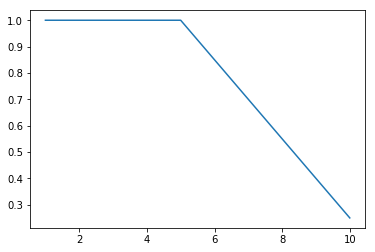

In [9]:
from sklearn.model_selection import train_test_split # to obtain the train, validation and test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.4)# 60% for training
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5) # 20% validation and 20 % test

neighbours = [1, 2, 5, 10] # number of neighbours to test
accuracy = np.zeros(len(neighbours))

for index in range(len(neighbours)):
    clf = KNeighborsClassifier(n_neighbors=neighbours[index])
    clf.fit(X_train, y_train)
    accuracy[index] = accuracy_score(y_val, clf.predict(X_val))

plt.plot(neighbours, accuracy)

#chose K
K = neighbours[np.argmax(accuracy)]
#Get the performance on test data

clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train)
print('Best value of K is:%d'%K)
print('Accuracy on test data %.2f'%accuracy_score(y_test, clf.predict(X_test)))

### Classifying digits

Let us attempt to build a KNN classifier for digits. We will use one of the datasets already available of scikit learn. The digits are 8-by-8 images stored in an array of length 64.

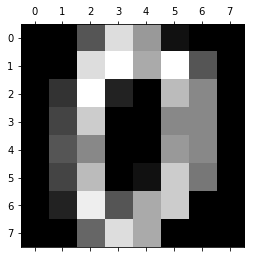

In [10]:
#load the data set and plot some samples
from sklearn.datasets import load_digits
digits = load_digits()
X_digits = digits.images
y_digits = digits.target
plt.gray()
plt.matshow(X_digits[0]) 


In [11]:
# Repeat the procedure of dividing the data into training, validation 
# and test set and train a K nearest neighbour classifier 

In [12]:
# Repeat this using the MNIST dataset